In [40]:
import pandas as pd

#https://www.kaggle.com/uciml/autompg-dataset
car_data = pd.read_csv("datasets-1489-2704-auto-mpg.csv")

In [41]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [42]:
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [43]:
car_data[car_data["horsepower"] == "?"] ##found above horsepower type "object" which is tring... 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [44]:
## remove the above rows or... we could "imputate" 
## i.e. replace the rows of unknown data with the average of the whole column
car_data_clean = car_data[car_data["horsepower"] != "?"]

In [45]:
car_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [46]:
#covert horsepower dtype 'object' to 'float' -- .astype(float)
car_data_clean["horsepower"] = car_data_clean["horsepower"].astype(float)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
car_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


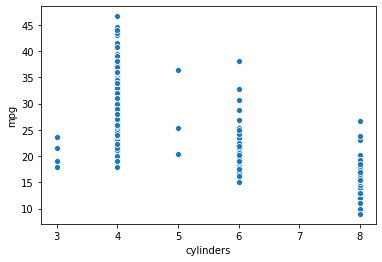

In [48]:
import seaborn as sns
sns.scatterplot(x="cylinders", y="mpg", data=car_data_clean)

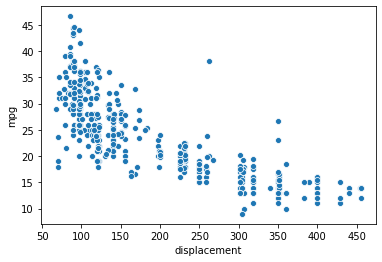

In [49]:
sns.scatterplot(x="displacement", y="mpg", data=car_data_clean)

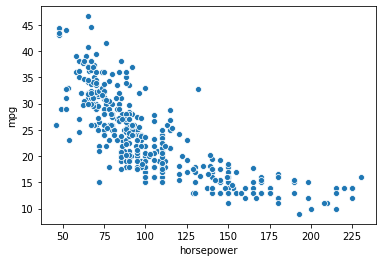

In [50]:
sns.scatterplot(x="horsepower", y="mpg", data=car_data_clean)

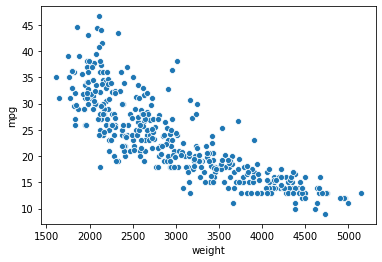

In [51]:
sns.scatterplot(x="weight", y="mpg", data=car_data_clean)

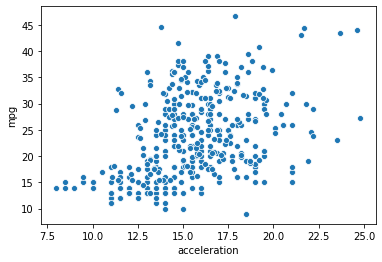

In [52]:
sns.scatterplot(x="acceleration", y="mpg", data=car_data_clean)

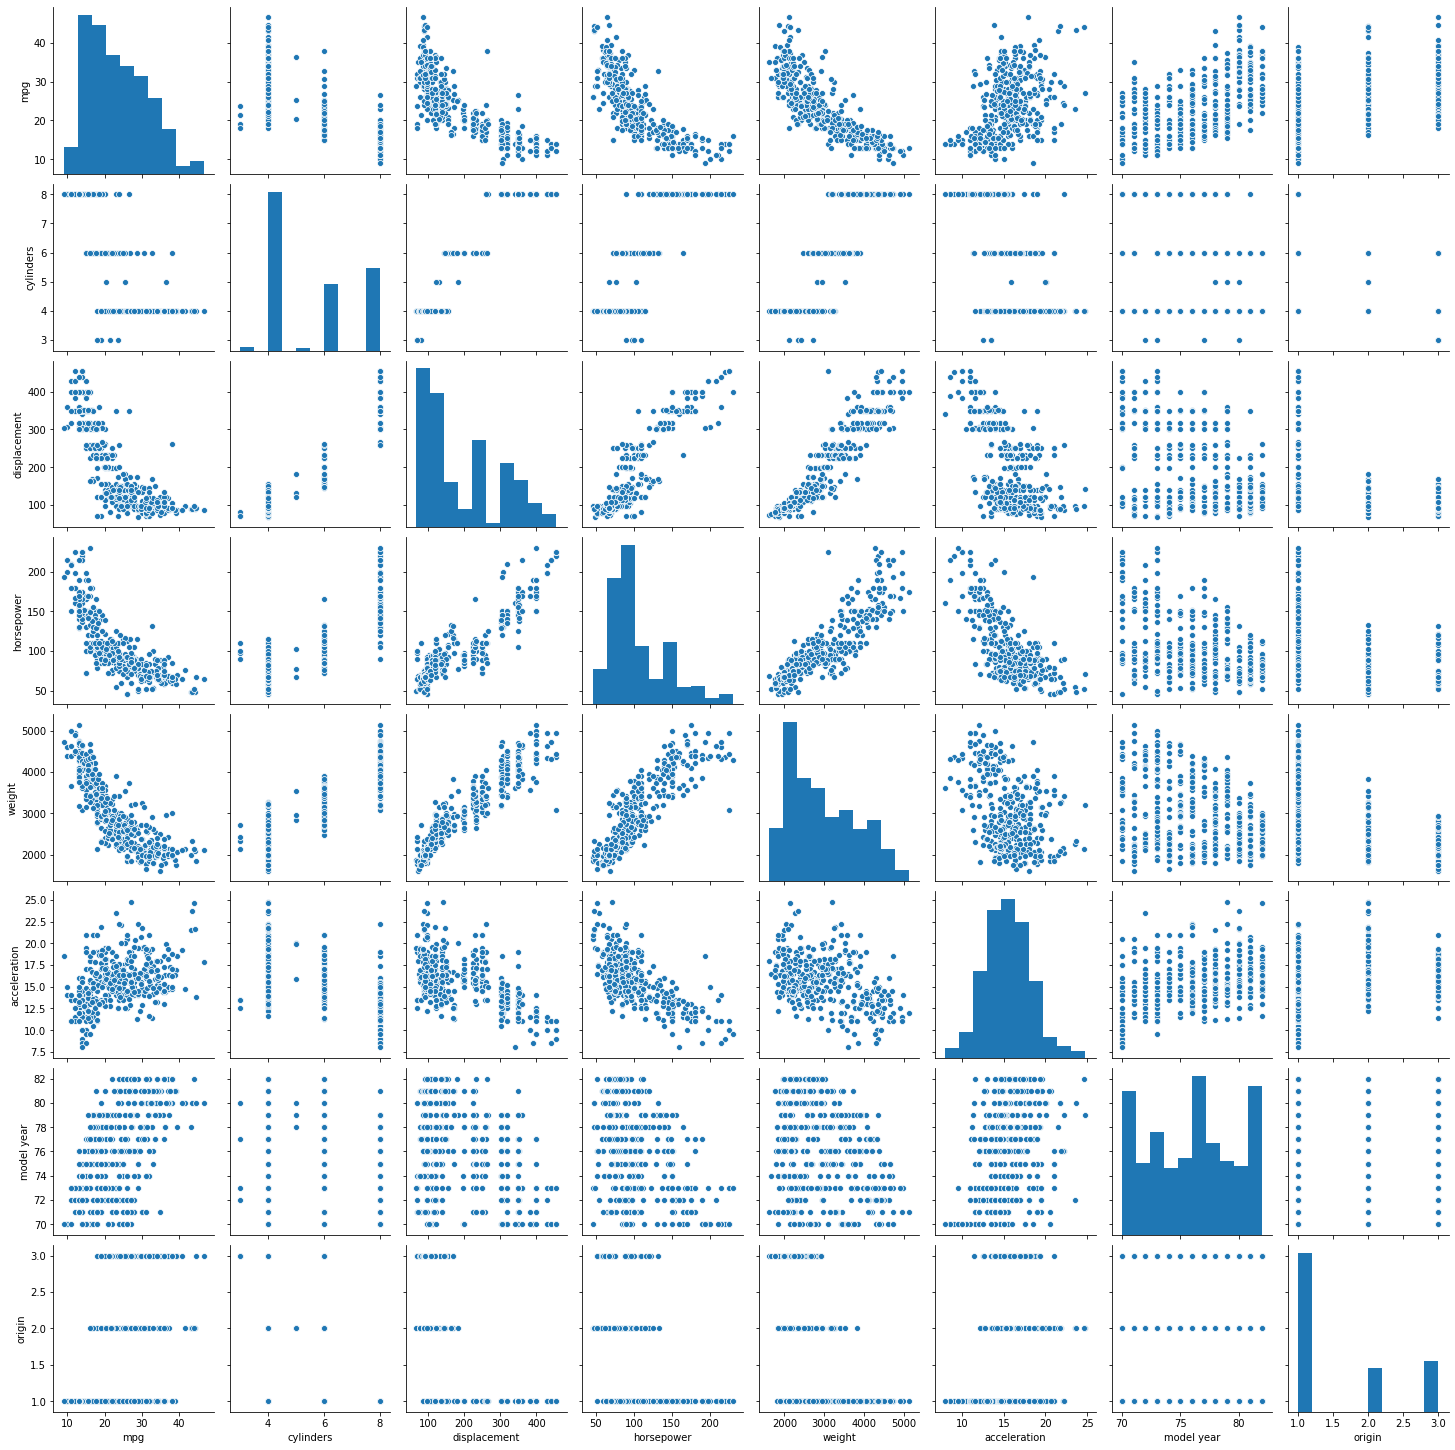

In [53]:
sns.pairplot(car_data_clean)

## Selecting Target and Features

In [54]:
#Target
y = car_data_clean["mpg"]

#Features
X = car_data_clean[["cylinders","displacement","horsepower","weight","acceleration"]]

## Test Train Split

In [55]:
from sklearn.model_selection import train_test_split

## allocate 70% at random to training data - to train the model to understand how to predict sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Linear Regression Model

In [56]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

In [57]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
##Predictions -- test set on which to make a prediction for MPG
mpg_pred = pd.DataFrame({
    "cylinders":[6]
    ,"displacement":[300]
    ,"horsepower":[100]
    ,"weight":[500]
    ,"acceleration":[10]
})
mpg_pred ##below shows predicted mpg for the setup above

,cylinders,displacement,horsepower,weight,acceleration
0,6,300,100,500,10


In [60]:
reg.predict(mpg_pred) ## predicted mpg for the above combination 35.22 mpg as per the data provided above

array([35.22049578])

In [61]:
predictions = reg.predict(X_test)
predictions

array([30.26993568, 24.81421442, 32.72542764, 31.2143536 , 26.35532876,
       30.17503577, 10.01476022, 29.55892764, 22.5525061 , 32.99030574,
       13.37451791, 23.82759327, 12.80957341, 30.12087743, 20.10568613,
       27.0644047 , 23.4465105 , 29.16903457, 27.39927408, 27.74396905,
       24.77092006, 31.13986407, 31.42554543, 18.65438675, 31.6812747 ,
       28.85910135, 25.31273149, 21.19339462, 32.518598  , 28.21336839,
       13.03899713, 22.98259744, 18.52638794, 27.72907122, 12.46530724,
       31.42350227, 12.55237942, 29.99744153, 14.17753496,  8.24062871,
       15.74100743, 30.48559929, 31.07057313, 29.42406309, 11.86711191,
        7.3738267 , 22.09752824, 30.75425705, 28.76694017, 31.64267557,
       13.96385509, 28.43174602, 28.62200304, 29.39388822, 23.6580181 ,
       19.67808964, 21.2883901 , 23.88612925, 27.91815763, 28.74832408,
        5.70786628, 23.55170332, 24.56419204, 25.4946903 , 27.22868116,
       29.39628394, 26.58491442, 31.65339072, 20.51245635, 10.30

In [62]:
y_test ## This is a series... 

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
       ... 
80     22.0
312    37.2
357    32.9
250    19.4
155    15.0
Name: mpg, Length: 118, dtype: float64

In [63]:
evaluate = pd.DataFrame({
    "actual" : y_test
    , "predicted" : predictions
})

evaluate["error"] = evaluate["actual"] - evaluate["predicted"]

evaluate.head()

,actual,predicted,error
79,26.0,30.269936,-4.269936
276,21.6,24.814214,-3.214214
248,36.1,32.725428,3.374572
56,26.0,31.214354,-5.214354
393,27.0,26.355329,0.644671


In [64]:
from sklearn import metrics

print("MSE = " + str(metrics.mean_squared_error(predictions, y_test)))

MSE = 18.57494831170693


In [65]:
print("RMSE = " + str(metrics.mean_squared_error(predictions, y_test, squared=False)))

RMSE = 4.30986639139857


In [66]:
reg.score(X_train, y_train)

0.7226277805521024

In [67]:
reg.coef_

array([-0.27472125, -0.00575768, -0.05591487, -0.00472429, -0.05357573])

In [68]:
reg.intercept_

47.08551660596743

In [69]:
y_hat = 47.08551660596743 + (-0.27472125*6) + -0.00575768*300 + -0.05591487*100 + -0.00472429*500 + -0.05357573*10

In [70]:
y_hat ## gives the same value as reg.predict(mpg_pred) above

35.22049580596743